# Aggregating, Grouping & Summary Statistics

1) .agg() method

2) .cummax(), .cummin(), .cumprod()

3) .drop_duplicates()

4) .groupby()

5) Pivot Tables

In [12]:
import pandas as pd

sales = pd.read_csv('sales_subset.csv', index_col = 0)
print(sales.head())

   store type  department        date  weekly_sales  is_holiday  \
0      1    A           1  2010-02-05      24924.50       False   
1      1    A           1  2010-03-05      21827.90       False   
2      1    A           1  2010-04-02      57258.43       False   
3      1    A           1  2010-05-07      17413.94       False   
4      1    A           1  2010-06-04      17558.09       False   

   temperature_c  fuel_price_usd_per_l  unemployment  
0       5.727778              0.679451         8.106  
1       8.055556              0.693452         8.106  
2      16.816667              0.718284         7.808  
3      22.527778              0.748928         7.808  
4      27.050000              0.714586         7.808  


In [13]:
sales["weekly_sales"].mean(), sales["weekly_sales"].std()

(23843.950148505668, 30220.387556900623)

### Aggregation Function

In [17]:
sales[["weekly_sales", "temperature_c"]].agg(['mean', 'min', 'max', 'std'])

,weekly_sales,temperature_c
mean,23843.950149,15.731978
min,-1098.000000,-8.366667
max,293966.050000,33.827778
std,30220.387557,9.922446


In [22]:
# .agg() method
# 34- Pandas DataFrames: Aggregation
# https://www.youtube.com/watch?v=2I2E1ZbF8pg

import numpy as np
def pct30(column):
    return column.quantile(0.3)

def pct40(column):
    return column.quantile(0.4)

def find_mean(num):
    return np.mean(num)

sales["weekly_sales"].agg([pct30,pct40, 'mean', 'max', 'min', 'std'])

pct30      5128.481000
pct40      8327.190000
mean      23843.950149
max      293966.050000
min       -1098.000000
std       30220.387557
Name: weekly_sales, dtype: float64

### Summaries on multiple columns

In [31]:
# Summaries on multiple columns
sales[["weekly_sales", "temperature_c"]].agg([pct30, pct40, 'min', 'max', 'mean', 'std'])

,weekly_sales,temperature_c
pct30,5128.481000,8.766667
pct40,8327.190000,11.522222
min,-1098.000000,-8.366667
max,293966.050000,33.827778
mean,23843.950149,15.731978
std,30220.387557,9.922446


In [23]:
sales[["weekly_sales", "temperature_c"]].agg([pct30, pct40])

,weekly_sales,temperature_c
pct30,5128.481,8.766667
pct40,8327.190,11.522222


## Cumulative Statistics (.cummax(), .cummin(), .cumprod())

In [24]:
sales["weekly_sales"].cumsum()

0        2.492450e+04
1        4.675240e+04
2        1.040108e+05
3        1.214248e+05
4        1.389829e+05
             ...     
10769    2.568930e+08
10770    2.568934e+08
10771    2.568938e+08
10772    2.568938e+08
10773    2.568947e+08
Name: weekly_sales, Length: 10774, dtype: float64

## Counting

### Drop Duplicates

In [3]:
# Drop Duplicates
import pandas as pd
homelessness = pd.read_csv('./Data/homelessness.csv', index_col = 0)
print(homelessness.head(3))

               region    state  individuals  family_members  state_pop
0  East South Central  Alabama       2570.0           864.0    4887681
1             Pacific   Alaska       1434.0           582.0     735139
2            Mountain  Arizona       7259.0          2606.0    7158024


In [25]:
dropped = homelessness.drop_duplicates(subset="region")
print(dropped)

                region        state  individuals  family_members  state_pop
0   East South Central      Alabama       2570.0           864.0    4887681
1              Pacific       Alaska       1434.0           582.0     735139
2             Mountain      Arizona       7259.0          2606.0    7158024
3   West South Central     Arkansas       2280.0           432.0    3009733
6          New England  Connecticut       2280.0          1696.0    3571520
7       South Atlantic     Delaware        708.0           374.0     965479
13  East North Central     Illinois       6752.0          3891.0   12723071
15  West North Central         Iowa       1711.0          1038.0    3148618
30        Mid-Atlantic   New Jersey       6048.0          3350.0    8886025


### Normalize Data

In [5]:
count = homelessness["region"].value_counts()
print(count)

South Atlantic        9
Mountain              8
West North Central    7
New England           6
Pacific               5
East North Central    5
East South Central    4
West South Central    4
Mid-Atlantic          3
Name: region, dtype: int64


In [26]:
normalize = homelessness["state_pop"].value_counts(normalize=True)
print(normalize.head())

4887681     0.019608
12800922    0.019608
3027341     0.019608
1353465     0.019608
8886025     0.019608
Name: state_pop, dtype: float64


### Grouped summary statistics

### .groupby()

In [27]:
# Grouped Summaries
homelessness.groupby("region")["state_pop"].mean()

region
East North Central    9.377277e+06
East South Central    4.775371e+06
Mid-Atlantic          1.373910e+07
Mountain              3.063968e+06
New England           2.471554e+06
Pacific               1.066462e+07
South Atlantic        7.247736e+06
West North Central    3.050034e+06
West South Central    1.005958e+07
Name: state_pop, dtype: float64

### Multiple grouped summaries

In [31]:
# Multiple grouped summaries
homelessness.groupby("region")["state_pop"].agg([find_mean, min, max])

,find_mean,min,max
region,,,
East North Central,9.377277e+06,5807406,12723071
East South Central,4.775371e+06,2981020,6771631
Mid-Atlantic,1.373910e+07,8886025,19530351
Mountain,3.063968e+06,577601,7158024
New England,2.471554e+06,624358,6882635
Pacific,1.066462e+07,735139,39461588
South Atlantic,7.247736e+06,701547,21244317
West North Central,3.050034e+06,758080,6121623
West South Central,1.005958e+07,3009733,28628666


### Grouping by multiple variables

In [32]:
# Grouping by multiple variables

homelessness.groupby(["region", "state"])["state_pop"].mean().head(10)

region              state      
East North Central  Illinois       12723071.0
                    Indiana         6695497.0
                    Michigan        9984072.0
                    Ohio           11676341.0
                    Wisconsin       5807406.0
East South Central  Alabama         4887681.0
                    Kentucky        4461153.0
                    Mississippi     2981020.0
                    Tennessee       6771631.0
Mid-Atlantic        New Jersey      8886025.0
Name: state_pop, dtype: float64

### Many groups, many summaries

In [33]:
# Many groups, many summaries

homelessness.groupby(["region", "state"])[["state_pop", "individuals"]].mean().head()

state_pop  individuals
region             state                             
East North Central Illinois   12723071.0       6752.0
                   Indiana     6695497.0       3776.0
                   Michigan    9984072.0       5209.0
                   Ohio       11676341.0       6929.0
                   Wisconsin   5807406.0       2740.0

## Pivot Tables

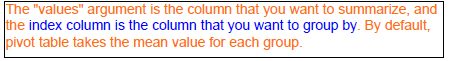

In [34]:
# Pivot Table

# The "values" argument is the column that you want to summarize, and the 
# index column is the column that you want to group by. By default, 
# pivot table takes the mean value for each group.

homelessness.pivot_table(values="state_pop", index="region")

,state_pop
region,
East North Central,9.377277e+06
East South Central,4.775371e+06
Mid-Atlantic,1.373910e+07
Mountain,3.063968e+06
New England,2.471554e+06
Pacific,1.066462e+07
South Atlantic,7.247736e+06
West North Central,3.050034e+06
West South Central,1.005958e+07


### Different statistics

In [35]:
import numpy as np
homelessness.pivot_table(values="state_pop", index="region", aggfunc=np.median)

,state_pop
region,
East North Central,9984072.0
East South Central,4674417.0
Mid-Atlantic,12800922.0
Mountain,2560041.0
New England,1346261.0
Pacific,4181886.0
South Atlantic,6035802.0
West North Central,2911359.0
West South Central,4299962.5


### Multiple Statistics

In [36]:
homelessness.pivot_table(values="state_pop", index="region", aggfunc=[np.mean, np.median])

,mean,median
,state_pop,state_pop
region,,
East North Central,9.377277e+06,9984072.0
East South Central,4.775371e+06,4674417.0
Mid-Atlantic,1.373910e+07,12800922.0
Mountain,3.063968e+06,2560041.0
New England,2.471554e+06,1346261.0
Pacific,1.066462e+07,4181886.0
South Atlantic,7.247736e+06,6035802.0
West North Central,3.050034e+06,2911359.0


### Pivot on two variables

In [38]:
homelessness.pivot_table(values="state_pop", index="region", columns="state").head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
region,,,,,,,,,,,,,,,,,,,,,
East North Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5807406.0,NaN
East South Central,4887681.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6771631.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mid-Atlantic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mountain,NaN,NaN,7158024.0,NaN,NaN,5691287.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3153550.0,NaN,NaN,NaN,NaN,NaN,577601.0
New England,NaN,NaN,NaN,NaN,NaN,NaN,3571520.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,624358.0,NaN,NaN,NaN,NaN,NaN


### Fill Values

In [40]:
homelessness.pivot_table(values="state_pop", index="region", columns="state", fill_value=0).head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
region,,,,,,,,,,,,,,,,,,,,,
East North Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5807406,0
East South Central,4887681,0,0,0,0,0,0,0,0,0,...,0,6771631,0,0,0,0,0,0,0,0
Mid-Atlantic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mountain,0,0,7158024,0,0,5691287,0,0,0,0,...,0,0,0,3153550,0,0,0,0,0,577601
New England,0,0,0,0,0,0,3571520,0,0,0,...,0,0,0,0,624358,0,0,0,0,0


### Summing with pivot tables

In [41]:
homelessness.pivot_table(values="state_pop", index="region", columns="state", fill_value=0, margins=True).head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,All
region,,,,,,,,,,,,,,,,,,,,,
East North Central,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5807406,0,9.377277e+06
East South Central,4887681,0,0,0,0,0,0,0,0,0,...,6771631,0,0,0,0,0,0,0,0,4.775371e+06
Mid-Atlantic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.373910e+07
Mountain,0,0,7158024,0,0,5691287,0,0,0,0,...,0,0,3153550,0,0,0,0,0,577601,3.063968e+06
New England,0,0,0,0,0,0,3571520,0,0,0,...,0,0,0,624358,0,0,0,0,0,2.471554e+06
